In this notebook we will find the vibrational modes of a simple model of a building. We will assume that the mass of the floors are much more than the mass of the walls and that the lateral stiffness of the walls can be modeled by a simple linear spring. We will investigate how the building may vibrate under initial conditions that could be caused by a gust of wind.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.animation as animation

%matplotlib notebook

The mass of each floor and the lateral stiffness of each floor's walls are:

In [2]:
m = 4000  # kg
k = 5000  # N / m

In [3]:
np.set_printoptions(precision=5, linewidth=100, suppress=True)

In [4]:
M = m * np.eye(4)
M

array([[ 4000.,     0.,     0.,     0.],
       [    0.,  4000.,     0.,     0.],
       [    0.,     0.,  4000.,     0.],
       [    0.,     0.,     0.,  4000.]])

In [5]:
K = np.array([[10000, -5000, 0, 0],
              [-5000, 10000, -5000, 0],
              [0, -5000, 10000, -5000],
              [0, 0, -5000, 5000]])
K

array([[10000, -5000,     0,     0],
       [-5000, 10000, -5000,     0],
       [    0, -5000, 10000, -5000],
       [    0,     0, -5000,  5000]])

The system can be transformed into a symmetric eigenvalue problem by introducing the new coordinate:

$\mathbf{q}=\mathbf{L}\mathbf{x}$

$\mathbf{L}$ is the Cholesky decomposition of the mass matrix.

In [6]:
L = np.linalg.cholesky(M)
L

array([[ 63.24555,   0.     ,   0.     ,   0.     ],
       [  0.     ,  63.24555,   0.     ,   0.     ],
       [  0.     ,   0.     ,  63.24555,   0.     ],
       [  0.     ,   0.     ,   0.     ,  63.24555]])

Note that if $\mathbf{M}$ is diagonal the Cholesky decomposition is simply computed by taking the square root of the diagonal terms, i.e. $\mathbf{M}^{1/2} = L$.

In [7]:
M_half = np.sqrt(M)
M_half

array([[ 63.24555,   0.     ,   0.     ,   0.     ],
       [  0.     ,  63.24555,   0.     ,   0.     ],
       [  0.     ,   0.     ,  63.24555,   0.     ],
       [  0.     ,   0.     ,   0.     ,  63.24555]])

We will need the inverse of $\mathbf{L}$ to compute $\tilde{\mathbf{K}}$. NumPy provides a function that computes the inverse, `np.linalg.inv`.

In [8]:
L_inv = np.linalg.inv(L)
L_inv

array([[ 0.01581,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.01581,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.01581,  0.     ],
       [ 0.     ,  0.     ,  0.     ,  0.01581]])

Not that if $\mathbf{M}$ is diagonal you can compute the inverse of the squareroot of the diagonals, i.e. $\mathbf{M}^{-1/2}=\mathbf{L}^{-1}$.

In [9]:
M_neg_half = np.diag(M.diagonal()**-0.5)
M_neg_half

array([[ 0.01581,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.01581,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.01581,  0.     ],
       [ 0.     ,  0.     ,  0.     ,  0.01581]])

Now the transformed equation of motion:

$$\mathbf{q} + \tilde{\mathbf{K}} \mathbf{q} = 0$$

can be formed by calculating $\tilde{\mathbf{K}}=\mathbf{L}^{-1} \mathbf{K} \mathbf{L}^{-1}$.

In [10]:
K_tilde = L_inv @ K @ L_inv
K_tilde

array([[ 2.5 , -1.25,  0.  ,  0.  ],
       [-1.25,  2.5 , -1.25,  0.  ],
       [ 0.  , -1.25,  2.5 , -1.25],
       [ 0.  ,  0.  , -1.25,  1.25]])

Notice that $\tilde{\mathbf{K}}$ is symmetric, so we are guaranteed to get real eigenvalues and orthogonal eigenvectors when solving this system.

In [11]:
lambdas, P = np.linalg.eig(K_tilde)

In [12]:
lambdas

array([ 4.41511,  2.93412,  1.25   ,  0.15077])

The second array returned by `np.linalg.eig` contains the orthonormal eigenvectors. Each column is one eigenvector. Note that this is the $\mathbf{P}$ matrix where:

$$
\mathbf{P} = \left[ \mathbf{v}_1, \ldots, \mathbf{v}_4 \right]
$$

In [13]:
P

array([[ 0.42853,  0.65654, -0.57735,  0.22801],
       [-0.65654, -0.22801, -0.57735,  0.42853],
       [ 0.57735, -0.57735, -0.     ,  0.57735],
       [-0.22801,  0.42853,  0.57735,  0.65654]])

In [14]:
v1 = P[:, 0]
v1

array([ 0.42853, -0.65654,  0.57735, -0.22801])

# Exercise

Prove that the eigenvectors are orthonormal.

`np.linalg.eig` returns orthonormal eigenvectors. You can check the magnitude by ensuring that the square root of the dot product of a vector with itself is 1.

In [15]:
for evec in P.T:
    print(np.sqrt(np.dot(evec, evec)))

1.0
1.0
1.0
1.0


or:

In [16]:
for evec in P.T:
    print(evec.T @ evec)

1.0
1.0
1.0
1.0


An orthnormal matrix has the property that its transpose multiplied by itself is the identity matrix.

In [17]:
P.T @ P

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

The frequencies of each mode are the square root of the eigenvalues.

In [18]:
ws = np.sqrt(lambdas)
ws

array([ 2.10122,  1.71293,  1.11803,  0.38829])

The eigenvectors can be transformed into the units of the generalized coordinates by premultiplying by $\mathbf{L}^{-1}$.

$$
\mathbf{S} = \left[ \mathbf{u}_1, \ldots, \mathbf{u}_4 \right]
$$

In [19]:
S = L_inv @ P
S

array([[ 0.00678,  0.01038, -0.00913,  0.00361],
       [-0.01038, -0.00361, -0.00913,  0.00678],
       [ 0.00913, -0.00913, -0.     ,  0.00913],
       [-0.00361,  0.00678,  0.00913,  0.01038]])

# Visualize the modeshapes

Plot each of the eigenmodes in $\mathbf{S}$.

<IPython.core.display.Javascript object>


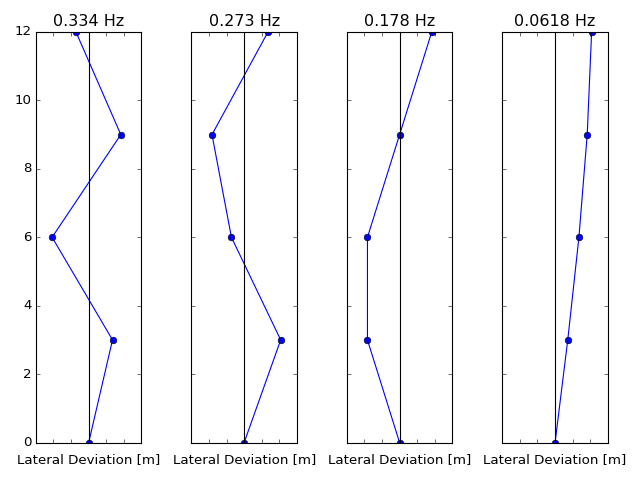

In [20]:
fig, axes = plt.subplots(1, 4, sharey=True, sharex=True)

for i, ax in enumerate(axes):
    
    ax.plot(np.hstack((0, S[:, i])), [0, 3, 6, 9, 12], marker='o')
    ax.axvline(0.0, color='black')
    
    ax.set_title('{:1.3} Hz'.format(ws[i] / 2 / np.pi))
    ax.set_xlabel('Lateral Deviation [m]')
    ax.set_xticklabels(ax.get_xticklabels())

plt.ylim((0, 12))

plt.tight_layout()

The trajectory of building's coordinates can be found with:

$$
\mathbf{x}(t) = \sum_{i=1}^n d_i \sin(\omega_i t + \phi_i) \mathbf{u}_i
$$

where

$$
\phi_i = \arctan \frac{\omega_i \mathbf{v}_i^T \mathbf{q}_0}{\mathbf{v}_i^T \dot{\mathbf{q}}_0}
$$

and

$$
d_i = \frac{\mathbf{v}^T_i \mathbf{q}_0}{\sin\phi_i}
$$

$d_i$ are the modal participation factors and reflect what propotional of each mode is excited given specific initial conditions. If the initial conditions are the eigenmode, $\mathbf{u}_i$, the all but the $i$th $d_i$ will be zero.

Given some initial conditions you can compute these quantities:

In [21]:
x0 = np.array([0.001, 0.010, 0.020, 0.025])
xd0 = np.zeros(4)

In [22]:
q0 = L @ x0
qd0 = L @ xd0

In [23]:
phis = np.arctan2(ws * P.T @ q0, P.T @ xd0)
phis

array([ 1.5708, -1.5708, -1.5708,  1.5708])

In [24]:
ds = P.T @ q0 / np.sin(phis)
ds

array([-0.01835,  0.15542, -0.51121,  2.05382])

In [25]:
t = np.linspace(0, 100, num=1000)

In [26]:
x = np.zeros((4, 1000))
for di, wi, phii, ui in zip(ds, ws, phis, S.T):
    x += di * np.sin(wi * t + phii) * np.tile(ui, (len(t), 1)).T

To check $d_i$ if the initial condition is $u_i$ to show that only one mode will be excited:

In [27]:
x0 = S[:, 0]
xd0 = np.zeros(4)
q0 = L @ x0
qd0 = L @ xd0
phis = np.arctan2(ws * P.T @ q0, P.T @ xd0)
ds = P.T @ q0 / np.sin(phis)
ds

array([ 1., -0.,  0., -0.])

# Exercise

Create a function called `simulate()` that returns the trajectories of the coordinates given an array of monotonically increasing time values and the initial conditions of the system. 

In [28]:
def simulate(t, x0, xd0):
    
    q0 = L @ x0
    qd0 = L @ xd0
    phis = np.arctan2(ws * P.T @ q0, P.T @ xd0)
    ds = P.T @ q0 / np.sin(phis)
    
    x = np.zeros((len(x0), len(t)))
    for di, wi, phii, ui in zip(ds, ws, phis, S.T):
        x += di * np.sin(wi * t + phii) * np.tile(ui, (len(t), 1)).T
    
    return x

In [29]:
def plot_trajectories(t, x):
    
    fig, axes = plt.subplots(4, 1)
    
    for i, ax in enumerate(axes.flatten()):
        ax.plot(t, x[i])
        ax.set_ylabel('Distance [m]')
    ax.set_xlabel('Time [s]')

<IPython.core.display.Javascript object>


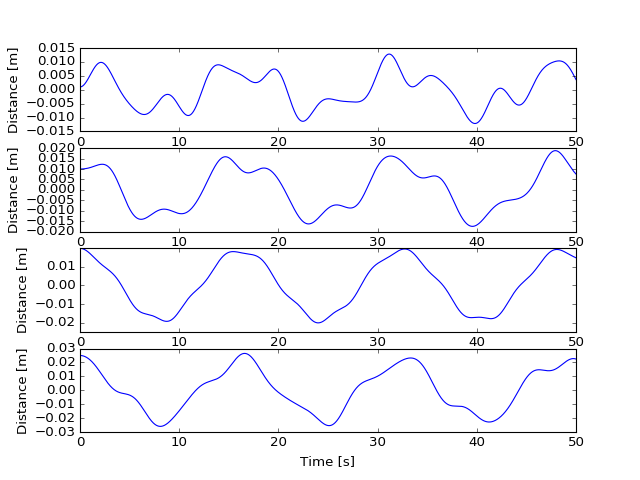

In [30]:
t = np.linspace(0, 50, num=50 * 60)
x0 = np.array([0.001, 0.010, 0.020, 0.025])
xd0 = np.zeros(4)
x = simulate(t, x0, xd0)
plot_trajectories(t, x)

This shows the plot of a single mode:

<IPython.core.display.Javascript object>


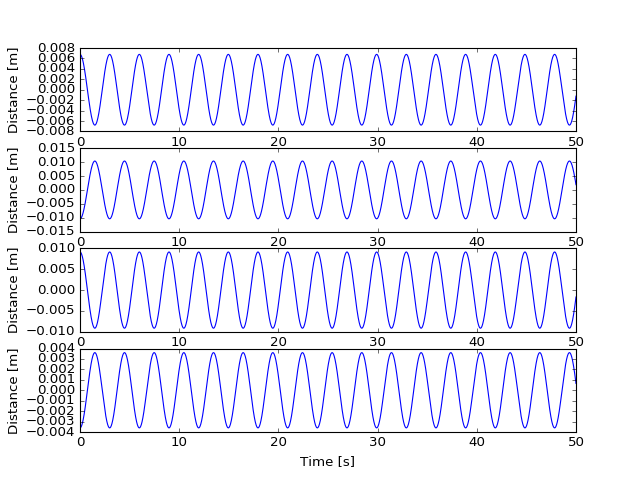

In [31]:
initial = S[:, 0]
x = simulate(t, initial, np.zeros(4))
plot_trajectories(t, x)

# Animate the motion

In [32]:
def plot_animation(t, x, scale=1):
    """Returns an animation object that shows the motion of the building given the coordinate trajectories.
    
    Parameters
    ==========
    t : ndarray, shape(n, )
        An array of monotonically increasing time values.
    x : ndarray, shape(n, 4)
        The trajectories of each of the floors' coordinates.
    scale : float
        A value to multiply the lateral motions by. Some of the motions are small, so this helps improve visualization.
        
    """
    
    fig, ax = plt.subplots(1, 1)

    width = 3  # meters
    height = 0.5  # meters

    ax.set_ylim((0, 14))
    ax.set_xlim((-5, 5))

    # create a rectangle for each floor
    rects = []
    for i in range(4):
        rect = Rectangle((-width / 2, 3 - height + i * 3), width, height, fill=False)
        rects.append(rect)
        ax.add_patch(rect)
        
    # make some vertical lines for the right and left walls    
    left_walls = ax.plot(-width / 2 * np.ones(5), [0, 3, 6, 9, 12], color='blue')[0]
    right_walls = ax.plot(width / 2 * np.ones(5), [0, 3, 6, 9, 12], color='blue')[0]

    ax.set_aspect('equal')

    def animate(i):
    
        # grab the ith coordinate vector
        xi = scale * x[:, i]
    
        # move each rectangle laterally by the associated coordinate
        for i, rect in enumerate(rects):
            rect.set_xy([-width / 2 + xi[i], 3 - height + i * 3])
            
        left_walls.set_xdata(-width / 2 * np.ones(5) + np.hstack((0, xi)))
        right_walls.set_xdata(width / 2 * np.ones(5) + np.hstack((0, xi)))

                   
    ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=1)
    
    return ani

<IPython.core.display.Javascript object>


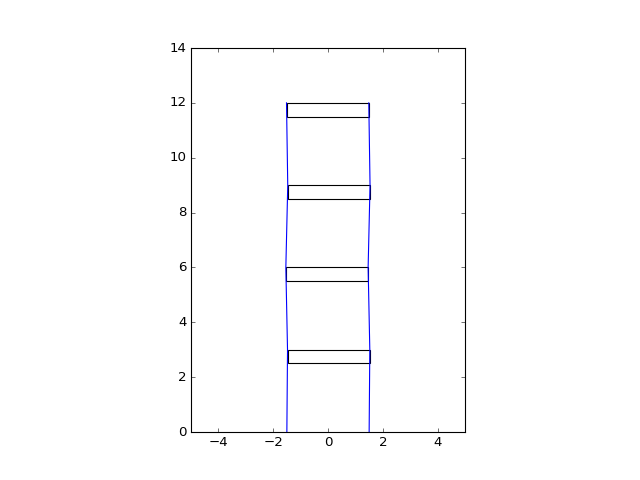

In [33]:
t = np.linspace(0, 50, num=50 * 60)
initial = S[:, 0]
x = simulate(t, initial, np.zeros(4))
plot_animation(t, x, scale=20)